In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import statsmodels as sm
import plotly.express as px
import seaborn as sns
import random

### Reading Data from csv files (takes long time)

In [2]:
checkpoints_df = pd.read_csv("checkpoints_eoc.csv")
#checkpoints_pulse_df = pd.read_csv("../datafest_csv_data/checkpoints_pulse.csv")
#items_df = pd.read_csv("../datafest_csv_data/items.csv")
media_views_df = pd.read_csv("media_views.csv")
page_views_df = pd.read_csv("page_views.csv")

#codebook_df = pd.read_csv("../datafest_csv_data/codebook.csv")
#variable_list_df = pd.read_csv("../datafest_csv_data/variable_list.csv")
responses_df = pd.read_csv("responses.csv")

/var/folders/53/5_qbvx717lqgszkck87j4hm00000gn/T/ipykernel_24651/2035507397.py:5: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  page_views_df = pd.read_csv("page_views.csv")
/var/folders/53/5_qbvx717lqgszkck87j4hm00000gn/T/ipykernel_24651/2035507397.py:9: DtypeWarning: Columns (34,35,36,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  responses_df = pd.read_csv("responses.csv")


### Codebook Dataframe

In [ ]:
codebook_df.head()
codebook_df.tail(10)

### Variable List Dataframe

In [ ]:
variable_list_df.head()
variable_list_df.tail()

### Checkpoints EOC Dataframe

In [ ]:
checkpoints_eoc_df.head()
#checkpoints_eoc_df.tail()

### Checkpoints Pulse Dataframe

In [ ]:
checkpoints_pulse_df.head()
checkpoints_pulse_df.tail()

### Items Dataframe

In [ ]:
items_df.head()
#items_df.tail()

### Media Views Dataframe

In [ ]:
media_views_df.head()
#media_views_df.tail()

### Page Views Dataframe



In [ ]:
page_views_df.head()
#page_views_df.tail()

### 14 min but it worked!!

In [37]:
from datetime import datetime, time

# responses_df['lrn_dt_started'] = pd.to_datetime(responses_df['lrn_dt_started'], errors='coerce')
# responses_df['lrn_dt_saved'] = pd.to_datetime(responses_df['lrn_dt_saved'], errors='coerce')

# Compute time difference in seconds
# responses_df['time_difference_seconds'] = (responses_df['lrn_dt_saved'] - responses_df['lrn_dt_started']).dt.total_seconds()

# Optionally, convert time difference to timedelta object
# responses_df['time_difference'] = pd.to_timedelta(responses_df['time_difference_seconds'], unit='s')

# print(responses_df["time_difference_seconds"])

responses_df['lrn_dt_started'] = pd.to_datetime(responses_df['lrn_dt_started'], errors='coerce')
responses_df['lrn_dt_started'] = responses_df['lrn_dt_started'].dt.time

responses_df['lrn_dt_saved'] = pd.to_datetime(responses_df['lrn_dt_saved'], errors='coerce')
responses_df['lrn_dt_saved'] = responses_df['lrn_dt_saved'].dt.time

responses_df['time_difference'] = responses_df['lrn_dt_saved'] - responses_df['lrn_dt_started']

responses_df['Timeinterval'] = responses_df['time_difference'].apply(lambda x: time(hour=int(x.total_seconds() // 3600),
minute=int((x.total_seconds() % 3600) // 60),
second=int(x.total_seconds() % 60)) if not pd.isnull(x) else None)

# responses_df['lrn_dt_started'] = pd.to_datetime(responses_df['lrn_dt_started'], errors='coerce')
# responses_df['lrn_dt_saved'] = pd.to_datetime(responses_df['lrn_dt_saved'], errors='coerce')


page_views_df['dt_accessed'] = pd.to_datetime(page_views_df['dt_accessed'], errors='coerce')
page_views_df['DT_accessed'] = page_views_df['dt_accessed'].dt.time

responses_df['dt_submitted'] = pd.to_datetime(responses_df['dt_submitted'], errors = "coerce")
responses_df['DT_submitted'] = responses_df['dt_submitted'].dt.time


# responses_df['time_difference'] = responses_df['lrn_dt_saved'] - responses_df['lrn_dt_started']

df = pd.DataFrame()

df['student_id'] = responses_df['student_id']

df['dt_submitted'] = responses_df['DT_submitted']
#df['dt_accessed'] = page_views_df['DT_accessed']

df['time_difference'] = responses_df['time_difference']

df = df.join(page_views_df.set_index('student_id')['DT_accessed'], on='student_id', how='right')

df2 = checkpoints_df.groupby(['student_id'])['EOC'].first().reset_index()

df2 = pd.merge(df, df2, on=['student_id'], how="left")

print(df2)



                                    student_id dt_submitted time_difference  \
0         953768c5-32fa-4190-8fee-1da82d8710bc     04:48:57             NaT   
1         953768c5-32fa-4190-8fee-1da82d8710bc     04:55:02             NaT   
2         953768c5-32fa-4190-8fee-1da82d8710bc     04:49:10             NaT   
3         953768c5-32fa-4190-8fee-1da82d8710bc     04:49:57             NaT   
4         953768c5-32fa-4190-8fee-1da82d8710bc     20:35:02             NaT   
...                                        ...          ...             ...   
88916805  358dde6e-b5ae-4fa4-898e-05cfff311129     22:43:00             NaT   
88916806  358dde6e-b5ae-4fa4-898e-05cfff311129     22:43:00             NaT   
88916807  358dde6e-b5ae-4fa4-898e-05cfff311129     22:43:00             NaT   
88916808  358dde6e-b5ae-4fa4-898e-05cfff311129     22:43:00             NaT   
88916809  358dde6e-b5ae-4fa4-898e-05cfff311129     22:43:00             NaT   

         DT_accessed       EOC  
0           00:47:

In [24]:
csv_path = "problem1EOCINCLUDED.csv"
df2.to_csv(csv_path, index = False)
df2.to_csv("EOC-and-time-data.csv",index=False)

KeyboardInterrupt: 

In [ ]:
df3.head()
df3.tail()

### simple description

In [ ]:

df3.describe()

## Consolidate chapter wise for time engaged with student ids

In [9]:
df = pd.DataFrame()
df2 = pd.DataFrame()

chapter_names = responses_df["chapter"].unique()

chapter_list = []
total_questions_list = []

student_chapter_question_counts = responses_df.groupby(['student_id', 'chapter', 'book']).size()
student_chapter_question_counts_df = student_chapter_question_counts.reset_index(name='question_count')

student_chapter_eoc_df = checkpoints_df.groupby(['student_id', 'chapter_number', 'book'])['EOC'].first().reset_index()

checkpoints_df['n_retries'] = checkpoints_df['n_attempt'] - checkpoints_df['n_possible']

n_retries_df = checkpoints_df.groupby(['student_id', 'chapter_number', 'book'])['n_retries'].sum().reset_index()

student_chapter_eoc_df = pd.merge(student_chapter_eoc_df, n_retries_df, on=['student_id', 'chapter_number', 'book'], how='left')

bruh = page_views_df[['student_id', 'page', 'chapter_number', 'tried_again_clicks']]
bruh.reset_index(drop = True, inplace = True)

tried_again_clicks_df = bruh.groupby(['student_id', 'chapter_number'])['tried_again_clicks'].sum().reset_index()

# Extract 'student_id', 'chapter_number', and 'engaged' columns from page_views_df
engaged_df = page_views_df[['student_id', 'chapter_number', 'engaged']]

# Group by 'student_id' and 'chapter_number' and sum the 'engaged' column
engaged_grouped = engaged_df.groupby(['student_id', 'chapter_number'])['engaged'].sum().reset_index()
merged_df = pd.merge(tried_again_clicks_df, student_chapter_eoc_df, on=['student_id', 'chapter_number'], how="left")
merged_df = pd.merge(merged_df, engaged_grouped, on=['student_id', 'chapter_number'], how='left')
merged_df.head()
merged_df.tail()

,student_id,chapter_number,tried_again_clicks,book,EOC,n_retries,engaged
0,001824fb-a2fd-431d-aef6-7a1250d97a62,1.0,12,College / Statistics and Data Science (ABC),0.921053,2,5663330.0
1,001824fb-a2fd-431d-aef6-7a1250d97a62,2.0,0,College / Statistics and Data Science (ABC),0.839080,40,30902762.0
2,001824fb-a2fd-431d-aef6-7a1250d97a62,3.0,0,College / Statistics and Data Science (ABC),0.769231,41,34127489.0
3,001824fb-a2fd-431d-aef6-7a1250d97a62,4.0,0,College / Statistics and Data Science (ABC),0.743590,99,18987025.0
4,001824fb-a2fd-431d-aef6-7a1250d97a62,5.0,14,College / Statistics and Data Science (ABC),0.777778,27,15971898.0


,student_id,chapter_number,tried_again_clicks,book,EOC,n_retries,engaged
2526,fef083e8-7167-4f42-82d5-d2e893aa408a,7.0,0,College / Statistics and Data Science (ABC),0.746269,14,11708939.0
2527,fef083e8-7167-4f42-82d5-d2e893aa408a,8.0,0,College / Statistics and Data Science (ABC),0.730337,61,15435994.0
2528,fef083e8-7167-4f42-82d5-d2e893aa408a,9.0,0,College / Statistics and Data Science (ABC),0.675214,79,14248225.0
2529,fef083e8-7167-4f42-82d5-d2e893aa408a,10.0,0,College / Statistics and Data Science (ABC),0.363636,68,3218168.0
2530,fef083e8-7167-4f42-82d5-d2e893aa408a,11.0,0,College / Statistics and Data Science (ABC),0.549296,24,5804630.0


### write above changes to new file

In [ ]:
merged_df.to_csv("final_updated_engaged.csv")

### boom

In [ ]:
# Assuming df is initialized with the 'student_id' column
df = pd.DataFrame({'student_id': media_views_df['student_id']})

# Convert datetime columns in responses_df
responses_df['lrn_dt_started'] = pd.to_datetime(responses_df['lrn_dt_started'], errors='coerce')
responses_df['lrn_dt_saved'] = pd.to_datetime(responses_df['lrn_dt_saved'], errors='coerce')

# Calculate time difference
responses_df['time_difference'] = responses_df['lrn_dt_saved'] - responses_df['lrn_dt_started']

# Merge responses_df
df = df.merge(responses_df[['student_id', 'time_difference', 'attempt']], on='student_id', how='left')

# Merge checkpoints_df
df = df.merge(checkpoints_df[['student_id', 'n_attempt', 'EOC']], on='student_id', how='left')

# Merge page_views_df
df = df.merge(page_views_df[['student_id', 'engaged']], on='student_id', how='left')

# Merge media_views_df
df = df.merge(media_views_df[['student_id', 'proportion_time', 'proportion_video']], on='student_id', how='left')
#df4.to_csv("VivienneProblem.csv")

In [ ]:
def main():
    pass 

In [ ]:
if __name__ == "__main__":
    main()

### dope visualizations 

In [9]:
# Convert necessary columns to datetime
responses_df['lrn_dt_started'] = pd.to_datetime(responses_df['lrn_dt_started'], errors='coerce')
responses_df['lrn_dt_saved'] = pd.to_datetime(responses_df['lrn_dt_saved'], errors='coerce')
page_views_df['dt_accessed'] = pd.to_datetime(page_views_df['dt_accessed'], errors='coerce')

# Calculate time difference
responses_df['time_difference'] = responses_df['lrn_dt_saved'] - responses_df['lrn_dt_started']

# Create DataFrame 'df' containing 'student_id', 'dt_submitted', and 'time_difference'
df = pd.DataFrame()
df['student_id'] = responses_df['student_id']
df['dt_submitted'] = responses_df['dt_submitted']
df['time_difference'] = responses_df['time_difference']
# Join 'df' with 'page_views_df' on 'student_id' to get 'dt_accessed'
df = df.join(page_views_df.set_index('student_id')['dt_accessed'], on='student_id', how='right')

# Group by 'student_id' in 'checkpoints_df' and get the first 'EOC'
df2 = checkpoints_df.groupby(['student_id'])['EOC'].first().reset_index()

# Merge 'df' with 'df2' on 'student_id' to include 'EOC'
df3 = pd.merge(df, df2, on=['student_id'], how='left')


In [5]:
# Select 1% of randomly sampled data
sample_size = int(len(df3) * 0.0001)
random_indices = random.sample(range(len(df3)), sample_size)
sampled_df = df3.iloc[random_indices]


<Axes: xlabel='dt_submitted', ylabel='dt_accessed'>

Text(0.5, 1.0, 'Relationship between Submission Time and Access Time with EOC (0.01% Sample)')

Text(0.5, 0, 'Submission Time')

Text(0, 0.5, 'Access Time')

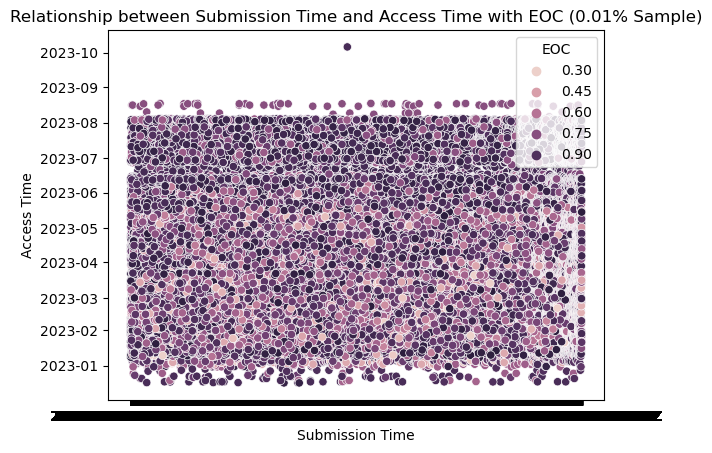

In [10]:

# # Visualizing relationship between 'dt_submitted' and 'dt_accessed' with 'EOC'
sns.scatterplot(data=sampled_df, x='dt_submitted', y='dt_accessed', hue='EOC')
plt.title('Relationship between Submission Time and Access Time with EOC (0.01% Sample)')
plt.xlabel('Submission Time')
plt.ylabel('Access Time')
plt.show()
# Visualizing relationship between 'dt_submitted' and 'dt_accessed' with 'EOC'
# Visualizing relationship between 'dt_submitted' and 'dt_accessed' with 'EOC


/Users/jonathanbateman/miniconda3/envs/viz-data-env/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='EOC', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of EOC Scores (1% Sample)')

Text(0.5, 0, 'EOC Score')

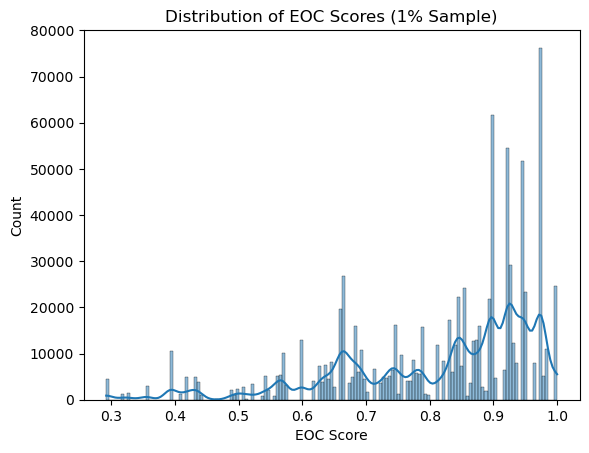

In [6]:

# Visualizing the distribution of 'EOC' scores for the sampled data
sns.histplot(data=sampled_df, x='EOC', kde=True)
plt.title('Distribution of EOC Scores (1% Sample)')
plt.xlabel('EOC Score')
plt.show()

In [8]:
import statsmodels.formula.api as smf

# Define the formula for the linear regression model
formula = 'dt_accessed ~ dt_submitted + time_difference'

# Fit the linear regression model
model = smf.ols(formula=formula, data=df3).fit()



# Linear Regression model between 'dt_submitted' and 'dt_accessed' for the sampled data
X = sampled_df['dt_submitted']
y = sampled_df['dt_accessed']

# Add a constant to the predictor variable for the intercept term
X['const'] = 1
# Fit the linear regression model
#model = sm.OLS(y, X).fit()
# Print the summary of the regression model
print(model.summary())

# Predict using the fitted model
y_pred = model.predict(X)

TypeError: Cannot interpret 'datetime64[ns, UTC]' as a data type

In [9]:

# Convert datetime values to Unix timestamps
sampled_df['dt_submitted_unix'] = sampled_df['dt_submitted'].astype(int) / 10**9  # Convert nanoseconds to seconds
sampled_df['dt_accessed_unix'] = sampled_df['dt_accessed'].astype(int) / 10**9

# Plot the original data and the predicted values
plt.scatter(sampled_df['dt_submitted_unix'], y, color='blue')
plt.plot(sampled_df['dt_submitted_unix'], y_pred, color='red')
plt.title('Linear Regression: dt_submitted vs. dt_accessed (Statsmodels) (1% Sample)')
plt.xlabel('Submission Time (Unix Timestamp)')
plt.ylabel('Access Time')
plt.show()

ValueError: invalid literal for int() with base 10: '2023-07-05T03:53:51Z'

In [10]:
# Visualizing 'engaged' with 'tried_again_clicks' for the sampled data
sns.scatterplot(data=sampled_df, x='engaged', y='tried_again_clicks', hue='EOC')
plt.title('Engagement vs Tried Again Clicks with EOC (1% Sample)')
plt.xlabel('Engaged')
plt.ylabel('Tried Again Clicks')
plt.show()

ValueError: Could not interpret value `engaged` for parameter `x`

In [11]:

# Using Plotly for interactive visualization for the sampled data
fig = px.scatter(sampled_df, x='engaged', y='tried_again_clicks', color='EOC', hover_data=['student_id'])
fig.update_layout(title='Interactive Visualization: Engagement vs Tried Again Clicks with EOC (1% Sample)')
fig.show()

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['student_id', 'dt_submitted', 'time_difference', 'dt_accessed', 'EOC'] but received: engaged